## IMPORT LIBRARIES

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
import pickle



/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


# LOAD AND SHOW DATA

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Sumit-saha12/Shipment-price-prediction/main/SCMS_Delivery_History_Dataset.csv")
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## OVERVIEW DATA

In [3]:
print('Total number of rows: ',data.shape[0])
print('Total number of column :',data.shape[1])
data.dtypes

Total number of rows:  10324
Total number of column : 33


ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


## DROP COLUMNS

In [4]:
data=data.drop(['Vendor','Item Description','Molecule/Test Type'],axis=1)
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## DATA CLEAN

In [5]:
data=data[data['First Line Designation']!='No']
data=data[data['Weight (Kilograms)']!='Weight Captured Separately']
data=data[data['Freight Cost (USD)']!='Freight Included in Commodity Cost']
data=data[data['Freight Cost (USD)']!='Invoiced Separately']
data=data[data['Freight Cost (USD)']!='Freight Included in Commodity Cost']

data=data.dropna(subset=['Line Item Insurance (USD)'])
data.head()


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,92,102-NG-T01,Pre-PQ Process,SCMS-592,ASN-485,Nigeria,PMO - US,Direct Drop,EXW,Air,...,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
24,130,100-HT-T01,Pre-PQ Process,SCMS-10080,ASN-628,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,750,53992.5,71.99,0.72,Inverness Japan,Yes,171,3518.38,86.39
25,134,100-HT-T01,Pre-PQ Process,SCMS-10130,ASN-616,Haiti,PMO - US,Direct Drop,EXW,Air,...,100,25,8750.0,350.00,3.50,"Pacific Biotech, Thailand",Yes,60,3097.85,14.00


Convert import datas object to numerics

In [6]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'])

data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64
Pack Price                      float64
Unit Price                      float64


In [7]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,5992.000000,5992.000000,5992.000000,5.992000e+03,5992.000000,5992.000000,5992.000000,5992.000000,5992.00000
mean,51573.725467,76.333611,21917.236482,1.953564e+05,23.928667,0.756891,3273.743825,11272.019543,296.92088
std,31196.405043,79.540002,43486.860613,3.773931e+05,46.380587,4.110614,7039.340764,15965.589608,553.33782
min,92.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.00000
25%,15735.250000,30.000000,1000.000000,1.041875e+04,4.300000,0.090000,216.750000,2181.512500,15.83000
50%,57962.500000,60.000000,4927.000000,5.982163e+04,9.500000,0.160000,1093.500000,6011.310000,90.53500
75%,83228.250000,100.000000,23125.000000,2.267010e+05,27.000000,0.660000,3416.000000,14547.550000,336.57000
max,86815.000000,1000.000000,619999.000000,5.951990e+06,1250.000000,238.650000,154780.000000,289653.200000,7708.44000


## ANALYSIS OF DATA

Creating data for analysis

In [8]:
order=data['PO / SO #'].nunique()
total_order=data['PO / SO #'].count()
duplicate_orders=total_order-order
total_unique_projects=data['Project Code'].nunique()
total_Freight_Cost=data['Freight Cost (USD)'].sum()
total_weight=data['Weight (Kilograms)'].sum()
avg_freight_cost_uniqueorder=total_Freight_Cost/order
avg_weight_uniqueorder=total_weight/order
unique_country=data['Country'].nunique()
unique_shipment_mode=data['Shipment Mode'].nunique()
country_summary=data.groupby(['Shipment Mode','Country','Freight Cost (USD)','Weight (Kilograms)']).sum().reset_index()
country_summary=country_summary[['Shipment Mode','Country','Freight Cost (USD)','Weight (Kilograms)']]
country_summary=data.groupby(['Shipment Mode','Country']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum','Weight (Kilograms)':'sum'}).reset_index()
country_summary['freight_cost_by_order']=country_summary['Freight Cost (USD)']/country_summary['PO / SO #']
top_ten_country_by_freight_cost=data.groupby(['Country'])['Freight Cost (USD)'].sum().nlargest(10).reset_index()
mf_summary=data.groupby(['Manufacturing Site']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum'}).reset_index()


Summary of some data

In [9]:
country_summary.head()

,Shipment Mode,Country,PO / SO #,Freight Cost (USD),Weight (Kilograms),freight_cost_by_order
0,Air,Afghanistan,2,1081.05,89,540.525000
1,Air,Angola,5,30832.07,1811,6166.414000
2,Air,Benin,7,66015.17,12015,9430.738571
3,Air,Botswana,58,133841.79,23429,2307.617069
4,Air,Burundi,56,312042.32,28714,5572.184286


In [10]:
top_ten_country_by_freight_cost.head()

,Country,Freight Cost (USD)
0,Nigeria,14124084.59
1,Zambia,6050441.94
2,Côte d'Ivoire,5963185.13
3,Rwanda,5712124.62
4,Uganda,5471629.20


In [11]:
mf_summary.head()

,Manufacturing Site,PO / SO #,Freight Cost (USD)
0,ABBVIE (Abbott) France,5,25601.63
1,ABBVIE (Abbott) Logis. UK,124,925352.27
2,ABBVIE (Abbott) St. P'burg USA,1,666.66
3,ABBVIE GmbH & Co.KG Wiesbaden,15,52522.81
4,ABBVIE Ludwigshafen Germany,274,1771746.86


## DATA VISUALIZATION

DATA HISTOGRAM GRAPH

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Unit of Measure (Per Pack)'}>,
        <AxesSubplot:title={'center':'Line Item Quantity'}>],
       [<AxesSubplot:title={'center':'Line Item Value'}>,
        <AxesSubplot:title={'center':'Pack Price'}>,
        <AxesSubplot:title={'center':'Unit Price'}>],
       [<AxesSubplot:title={'center':'Weight (Kilograms)'}>,
        <AxesSubplot:title={'center':'Freight Cost (USD)'}>,
        <AxesSubplot:title={'center':'Line Item Insurance (USD)'}>]],
      dtype=object)

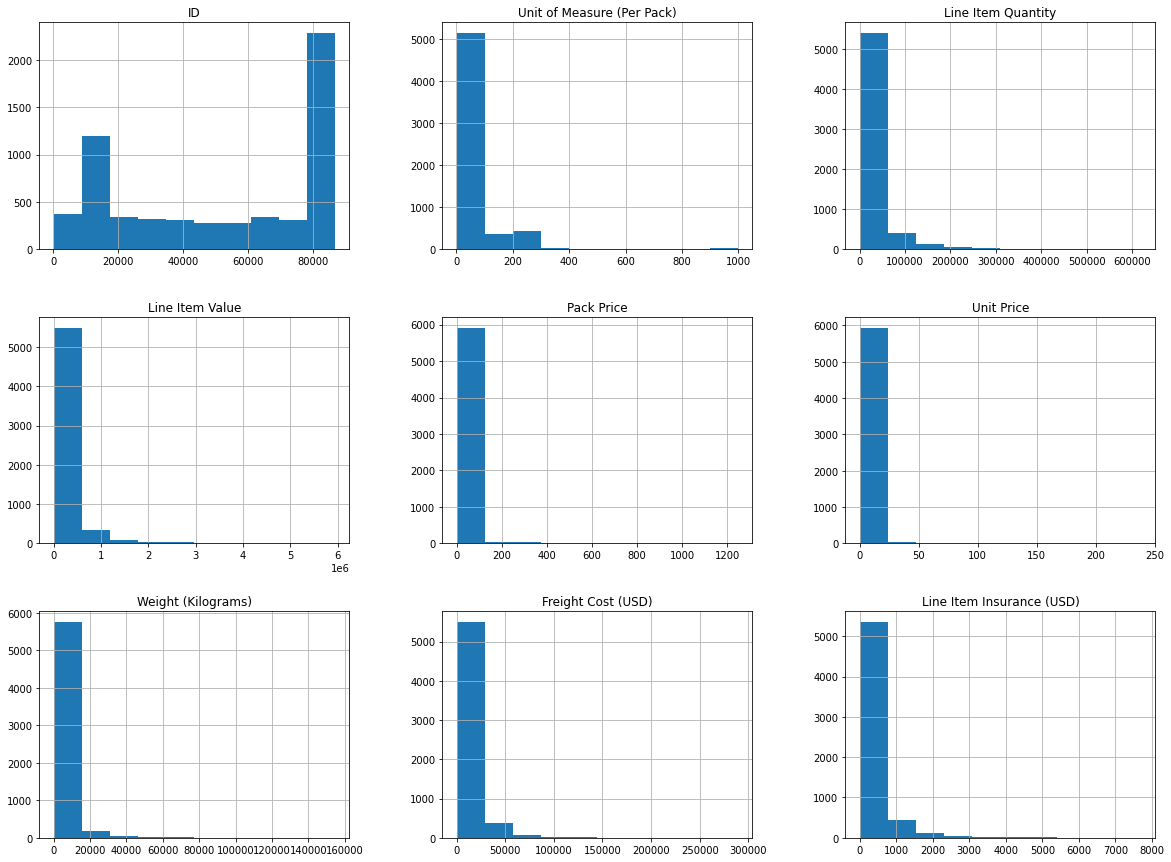

In [12]:
data.hist(figsize=(20,15))

Co-relation attributes each other

array([[<AxesSubplot:xlabel='Unit Price', ylabel='Unit Price'>,
        <AxesSubplot:xlabel='Pack Price', ylabel='Unit Price'>,
        <AxesSubplot:xlabel='Line Item Quantity', ylabel='Unit Price'>,
        <AxesSubplot:xlabel='Unit of Measure (Per Pack)', ylabel='Unit Price'>,
        <AxesSubplot:xlabel='Freight Cost (USD)', ylabel='Unit Price'>,
        <AxesSubplot:xlabel='Weight (Kilograms)', ylabel='Unit Price'>],
       [<AxesSubplot:xlabel='Unit Price', ylabel='Pack Price'>,
        <AxesSubplot:xlabel='Pack Price', ylabel='Pack Price'>,
        <AxesSubplot:xlabel='Line Item Quantity', ylabel='Pack Price'>,
        <AxesSubplot:xlabel='Unit of Measure (Per Pack)', ylabel='Pack Price'>,
        <AxesSubplot:xlabel='Freight Cost (USD)', ylabel='Pack Price'>,
        <AxesSubplot:xlabel='Weight (Kilograms)', ylabel='Pack Price'>],
       [<AxesSubplot:xlabel='Unit Price', ylabel='Line Item Quantity'>,
        <AxesSubplot:xlabel='Pack Price', ylabel='Line Item Quantity'>,
      

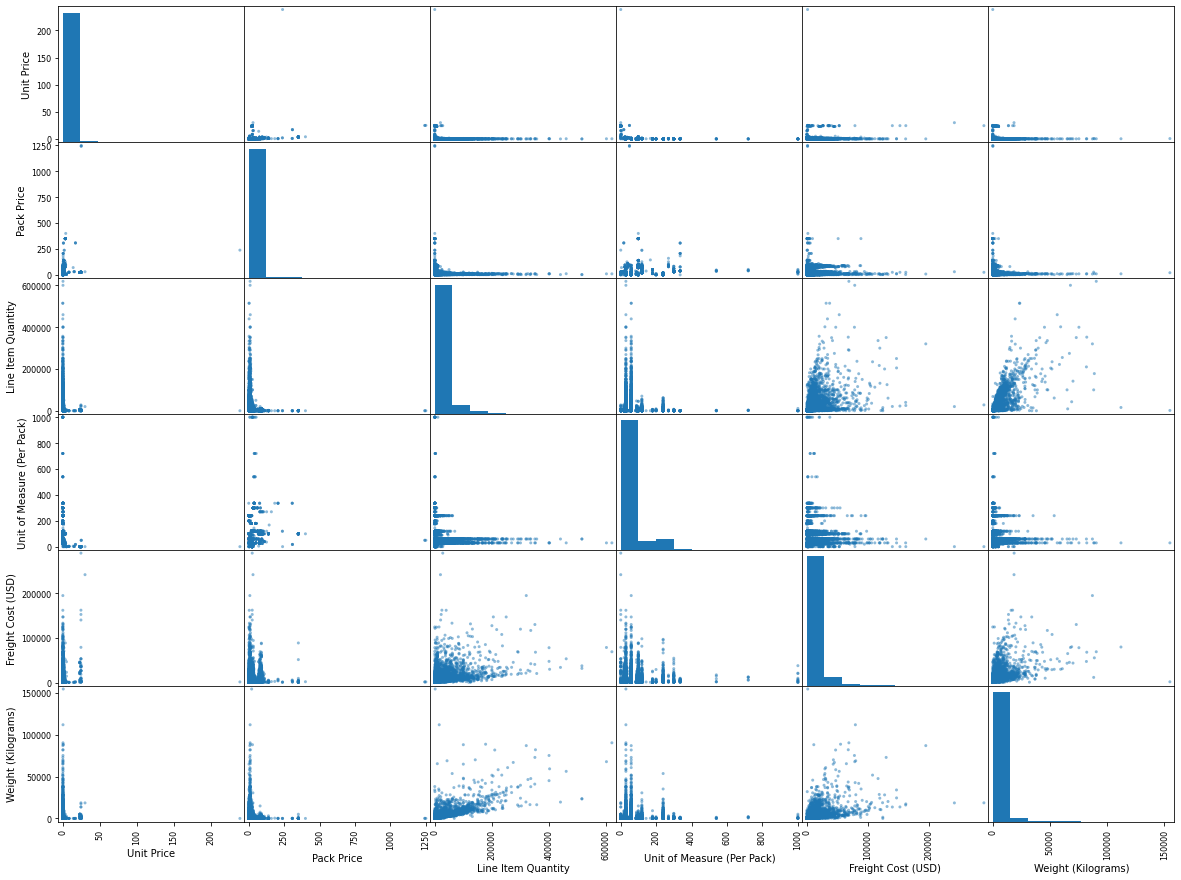

In [13]:
attributes = ['Unit Price','Pack Price','Line Item Quantity','Unit of Measure (Per Pack)','Freight Cost (USD)','Weight (Kilograms)']
scatter_matrix(data[attributes],figsize=(20,15))

Checking outlier by boxplot

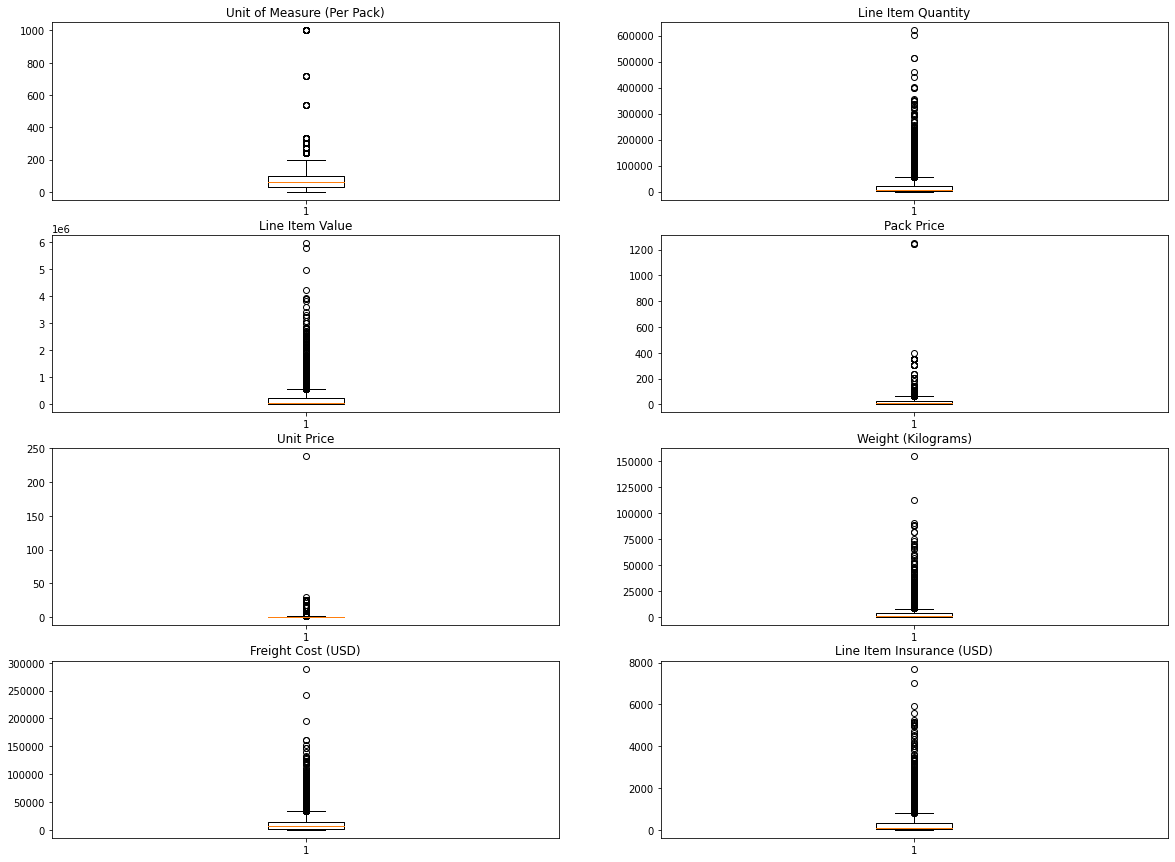

In [14]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2,figsize=(20,15))
ax1.boxplot(data['Unit of Measure (Per Pack)'])
ax1.set_title('Unit of Measure (Per Pack)')
ax2.boxplot(data['Line Item Quantity'])
ax2.set_title('Line Item Quantity')
ax3.boxplot(data['Line Item Value'])
ax3.set_title('Line Item Value')
ax4.boxplot(data['Pack Price'])
ax4.set_title('Pack Price')
ax5.boxplot(data['Unit Price'], )
ax5.set_title('Unit Price')
ax6.boxplot(data['Weight (Kilograms)'])
ax6.set_title('Weight (Kilograms)')
ax7.boxplot(data['Freight Cost (USD)'])
ax7.set_title('Freight Cost (USD)')
ax8.boxplot(data['Line Item Insurance (USD)'])
ax8.set_title('Line Item Insurance (USD)')

plt.show()


Freight_cost_by_order_by_country_order

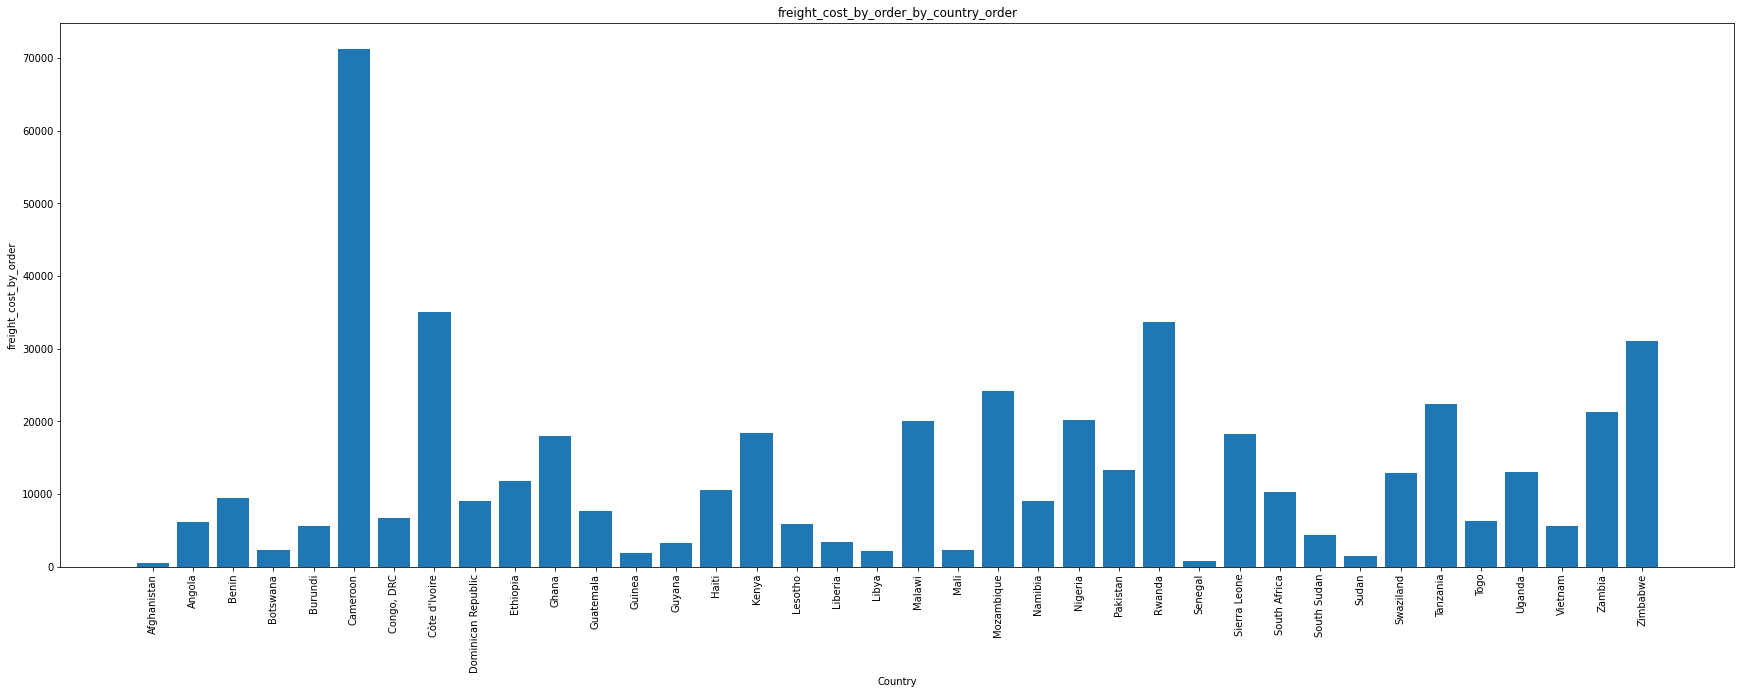

In [15]:

plt.figure(figsize=(30,10))
plt.rc({'font.size':30})
plt.bar(country_summary.Country,country_summary.freight_cost_by_order)
plt.xticks(rotation='vertical')
plt.ylabel('freight_cost_by_order')
plt.xlabel('Country')
plt.title('freight_cost_by_order_by_country_order')
plt.show()

Freight_cost_by_order_by_shipment_mode

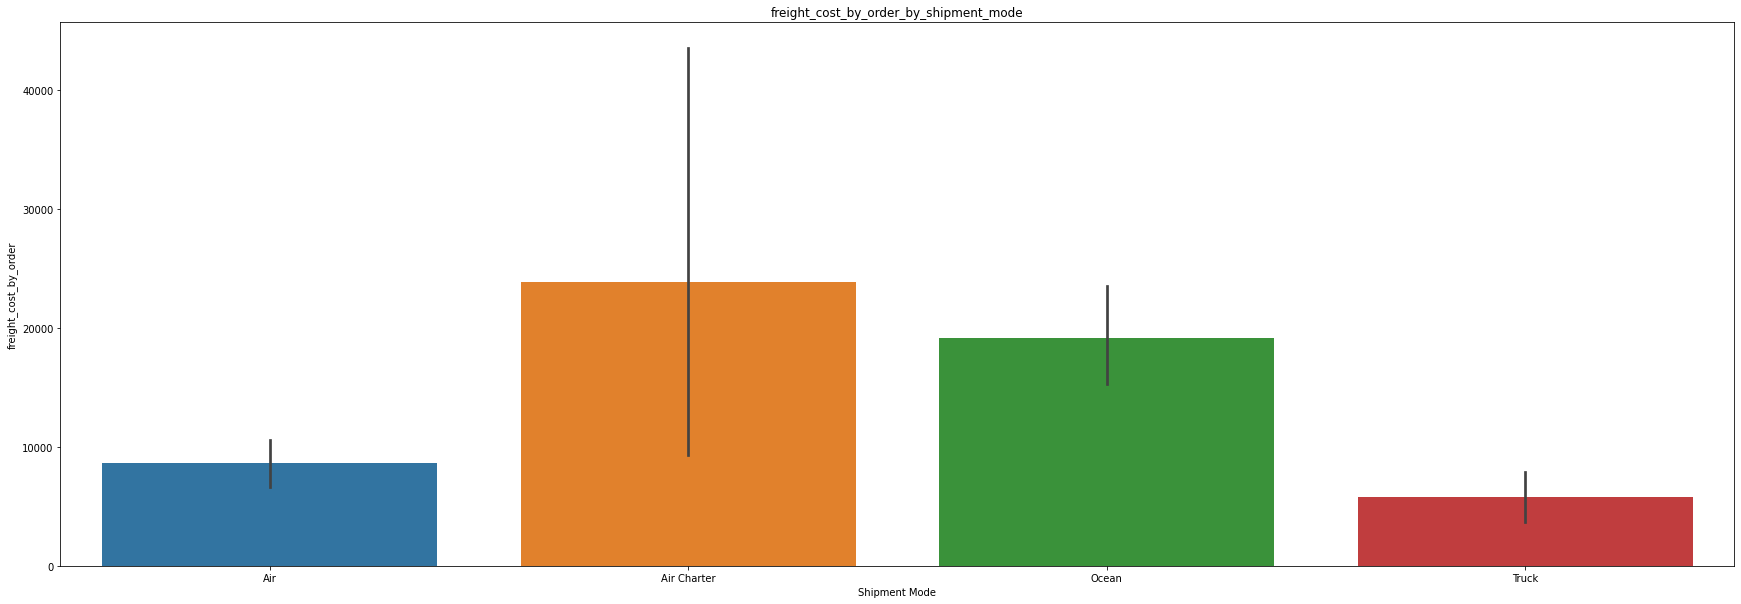

In [16]:
plt.figure(figsize=(30,10))
plt.rc({'font.size':30})
# plt.bar(country_summary.freight_cost_by_order,country_summary.Shipment Mode)
sns.barplot(x='Shipment Mode',y='freight_cost_by_order',data=country_summary)
plt.ylabel('freight_cost_by_order')
plt.xlabel('Shipment Mode')
plt.title('freight_cost_by_order_by_shipment_mode')
plt.show()

Order_by_country

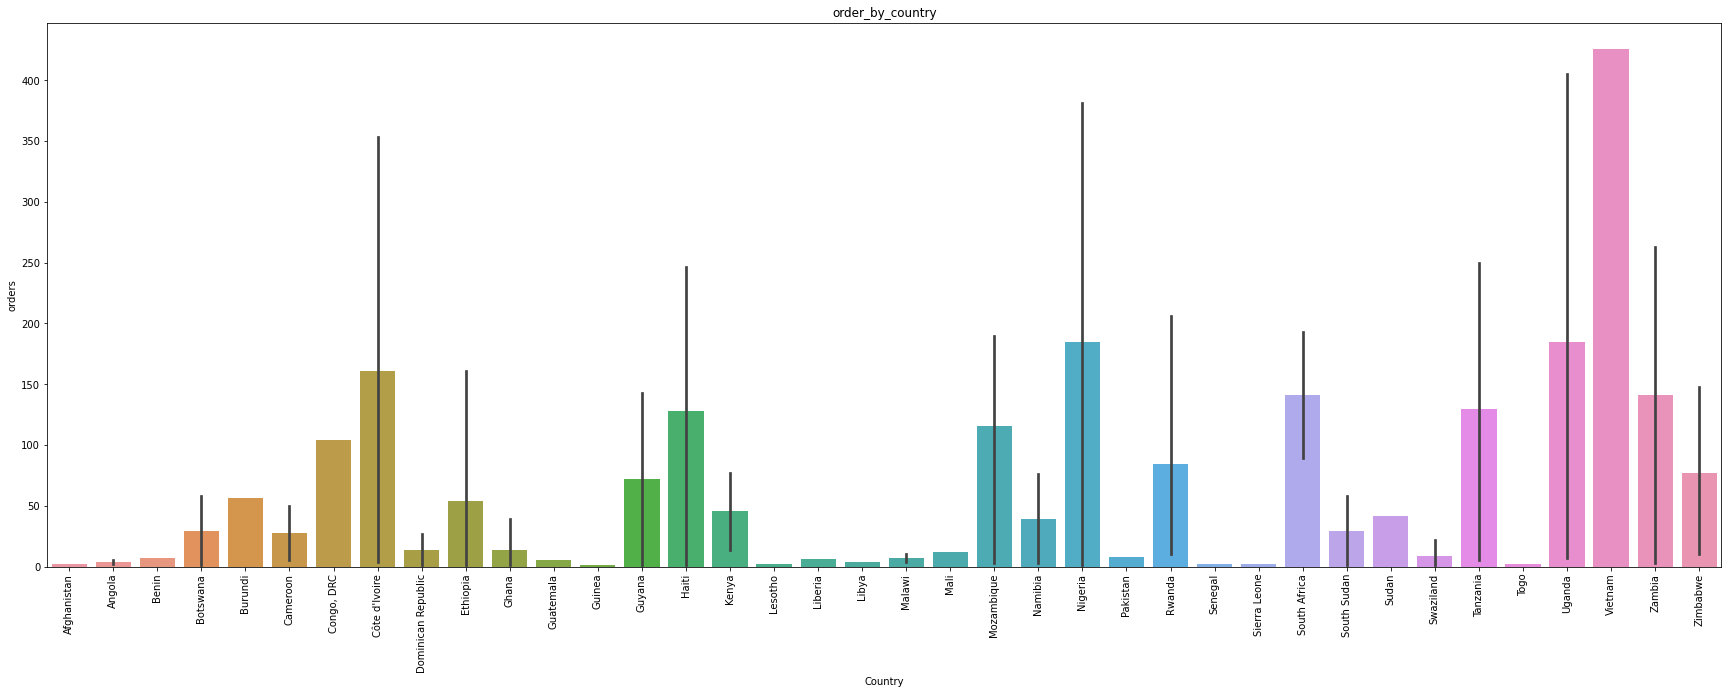

In [17]:
plt.figure(figsize=(30,10))
plt.rc({'font.size':30})
sns.barplot(x='Country',y='PO / SO #',data=country_summary)
plt.xticks(rotation='vertical')
plt.ylabel('orders')
plt.xlabel('Country')
plt.title('order_by_country')
plt.show()

This graph is displaying that Vietnam is a highest order country

Top_ten_country_by_freight_cost

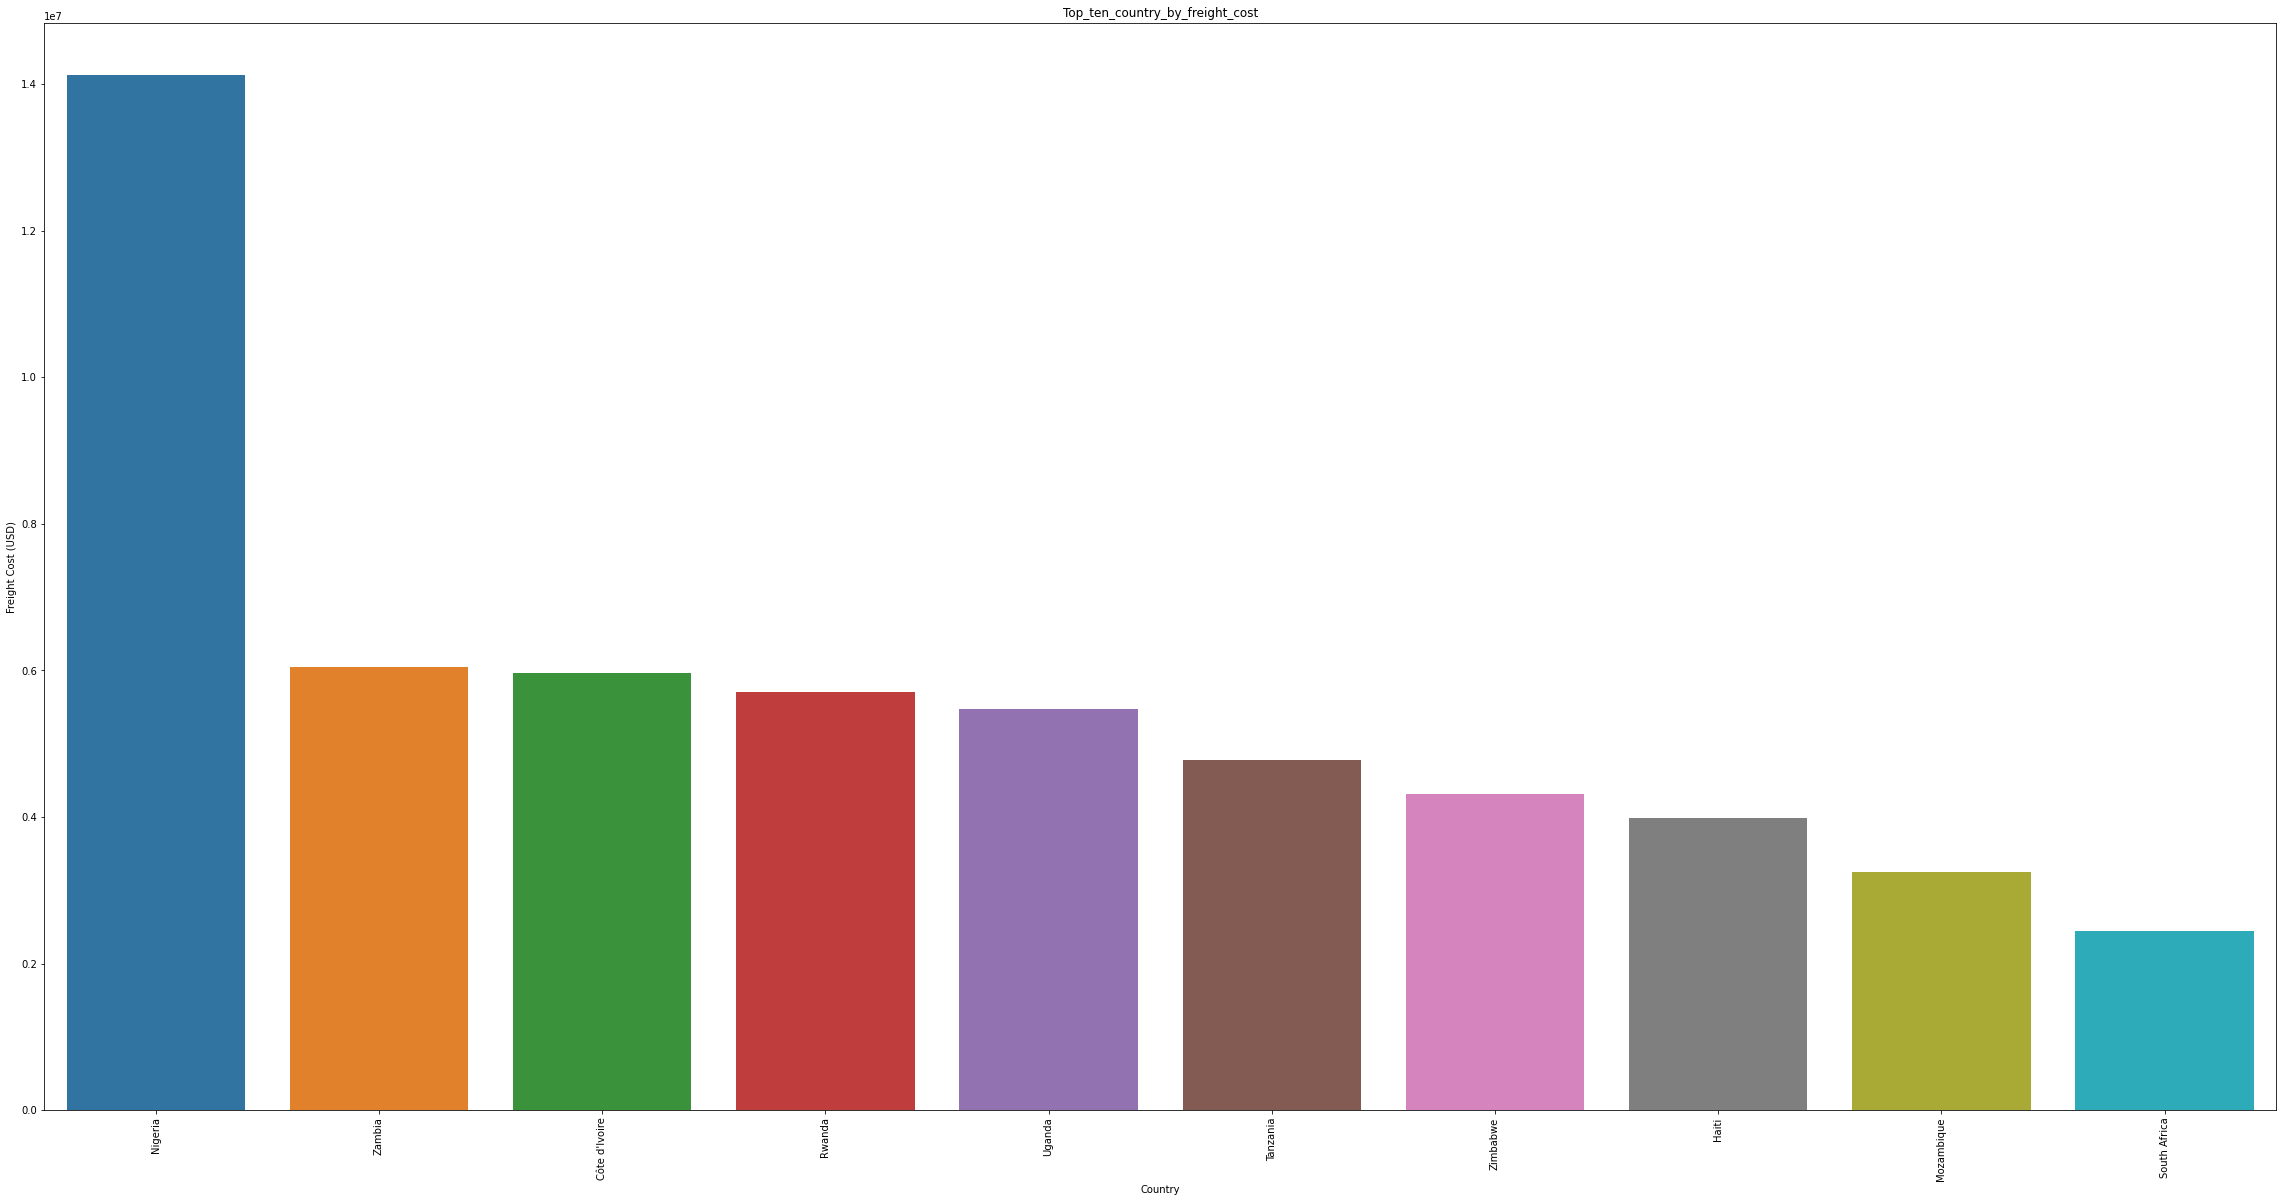

In [18]:
plt.figure(figsize=(40,20))
plt.rc({'font.size':30})
sns.barplot(x='Country',y='Freight Cost (USD)',data=top_ten_country_by_freight_cost)
plt.xticks(rotation='vertical')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Country')
plt.title('Top_ten_country_by_freight_cost')
plt.show()

Here Nigeria is a top country by freight cost

Manufacturing Site by freight cost

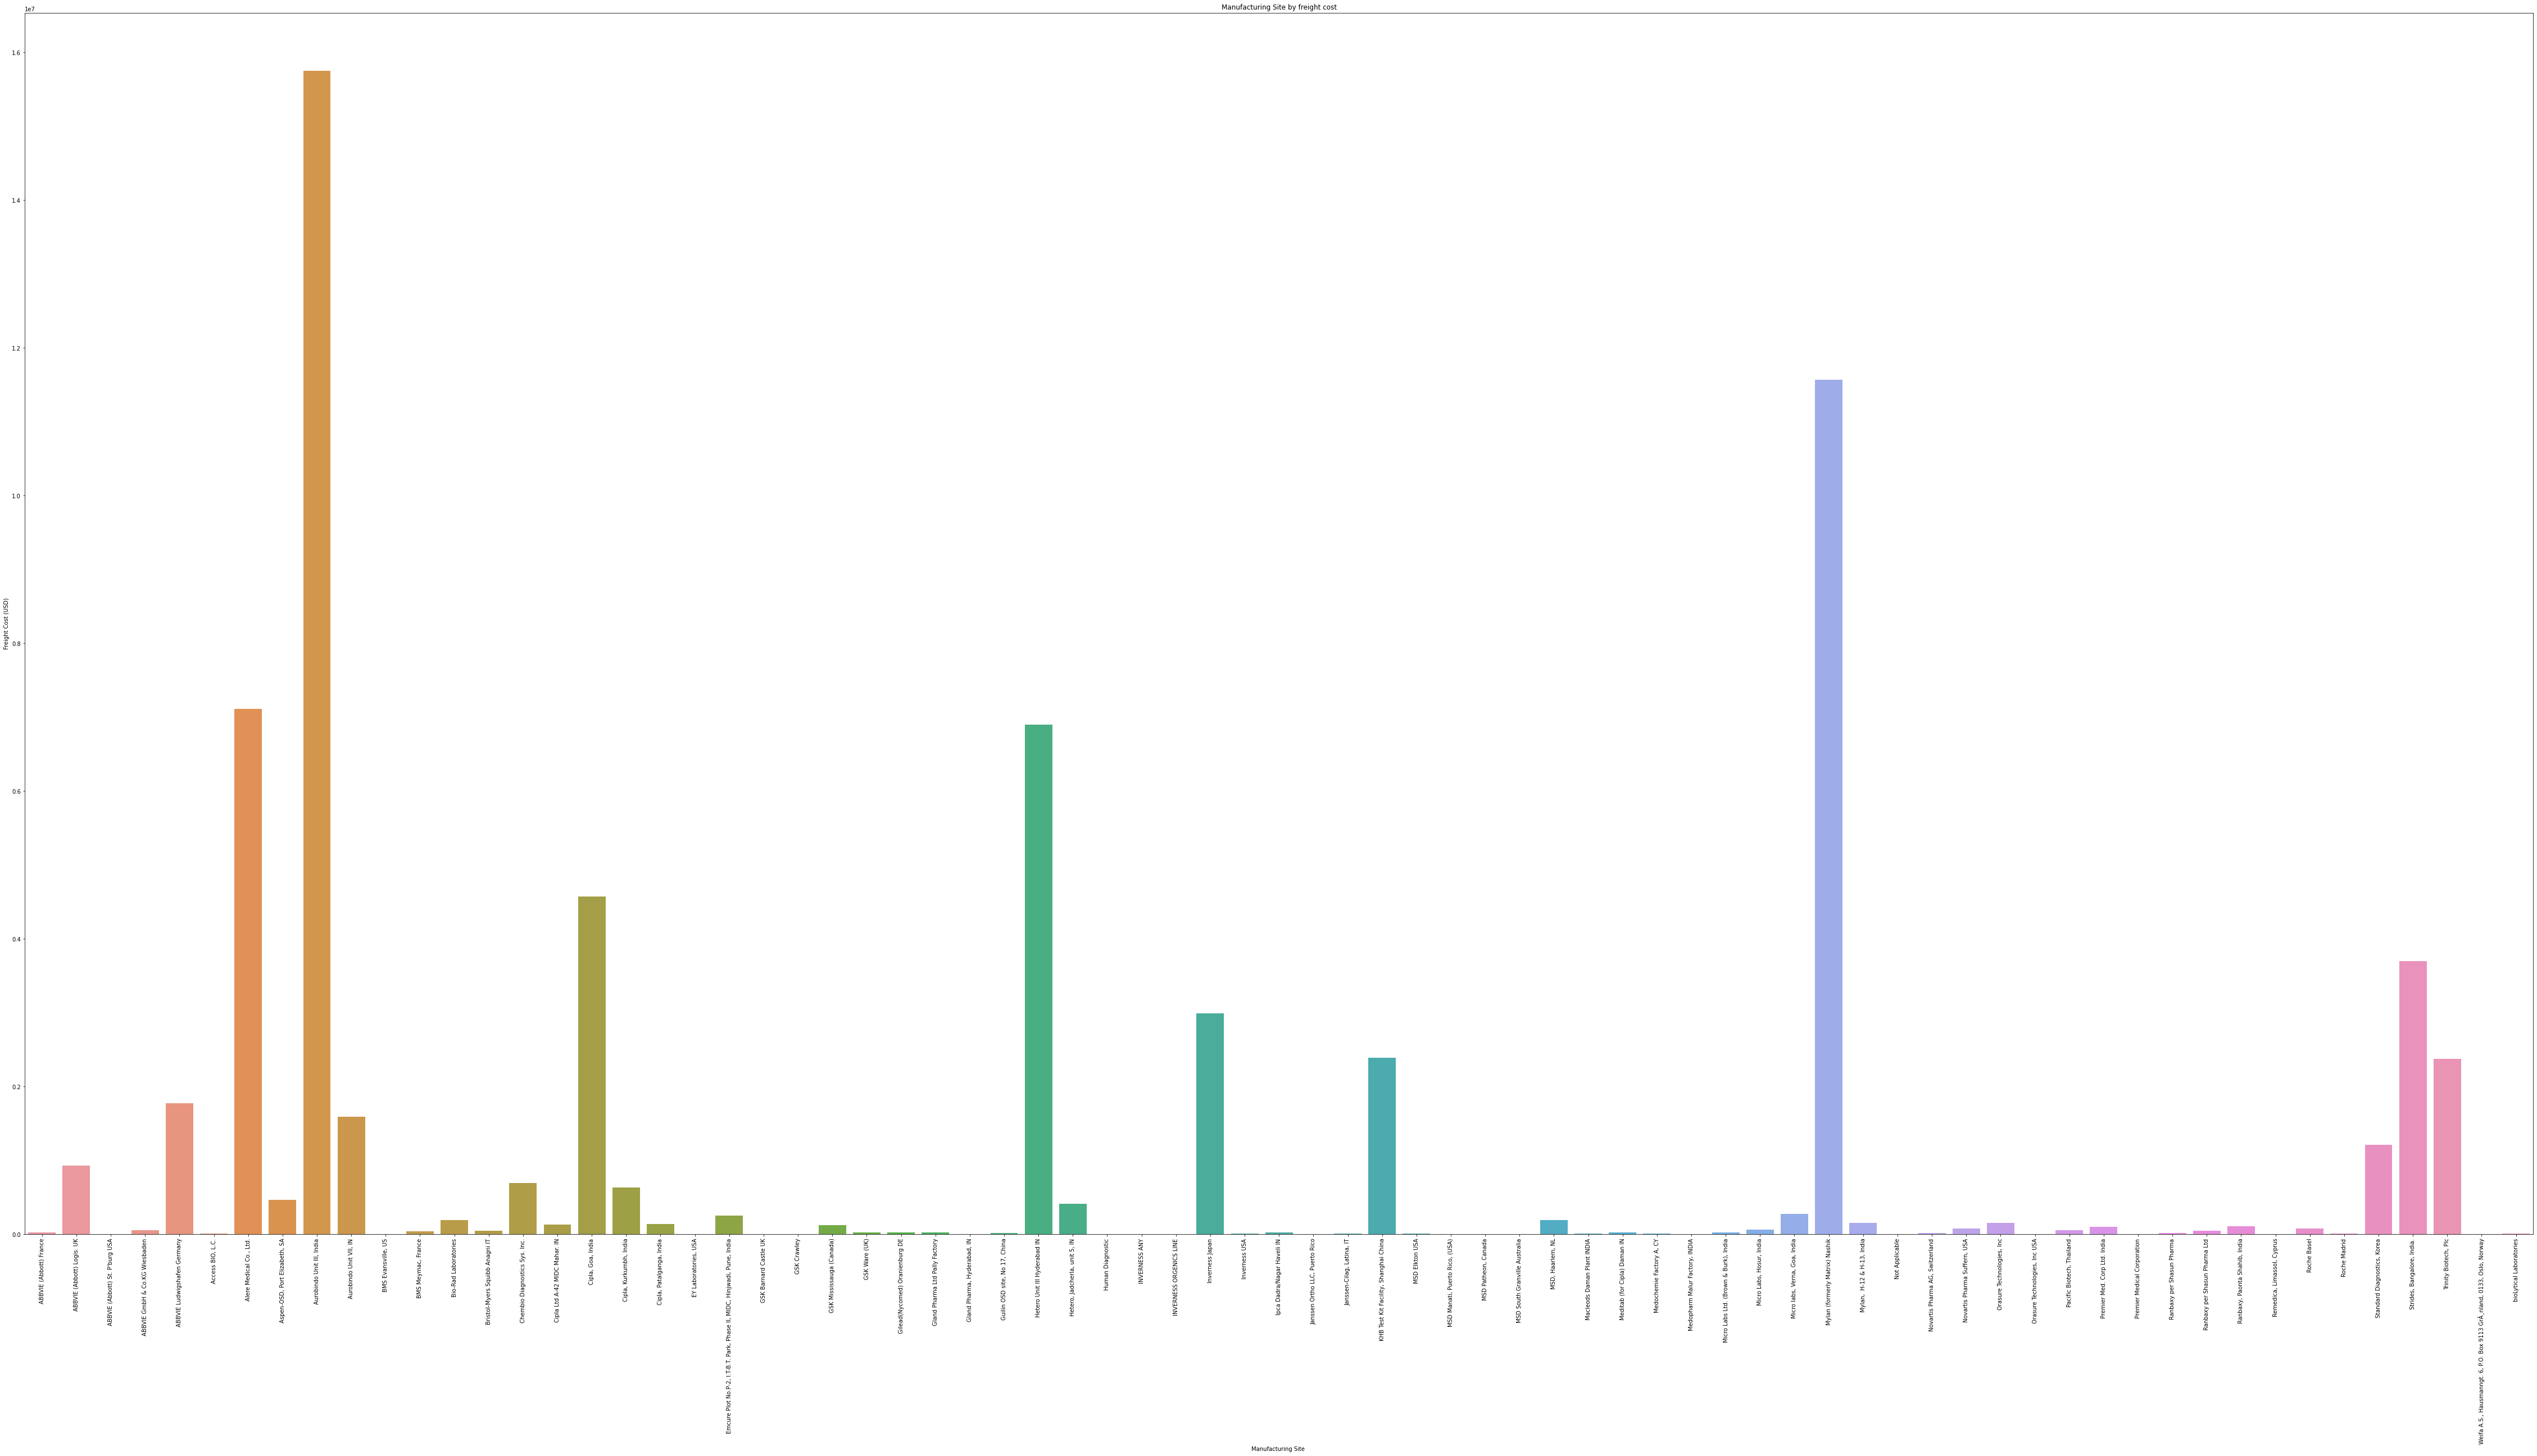

In [19]:
plt.figure(figsize=(80,40))
plt.rc({'font.size':120})
sns.barplot(x='Manufacturing Site',y='Freight Cost (USD)',data=mf_summary)
plt.xticks(rotation='vertical')
plt.ylabel('Freight Cost (USD)')
plt.xlabel('Manufacturing Site ')
plt.title('Manufacturing Site by freight cost')
plt.show()

Manufacturing Site by order

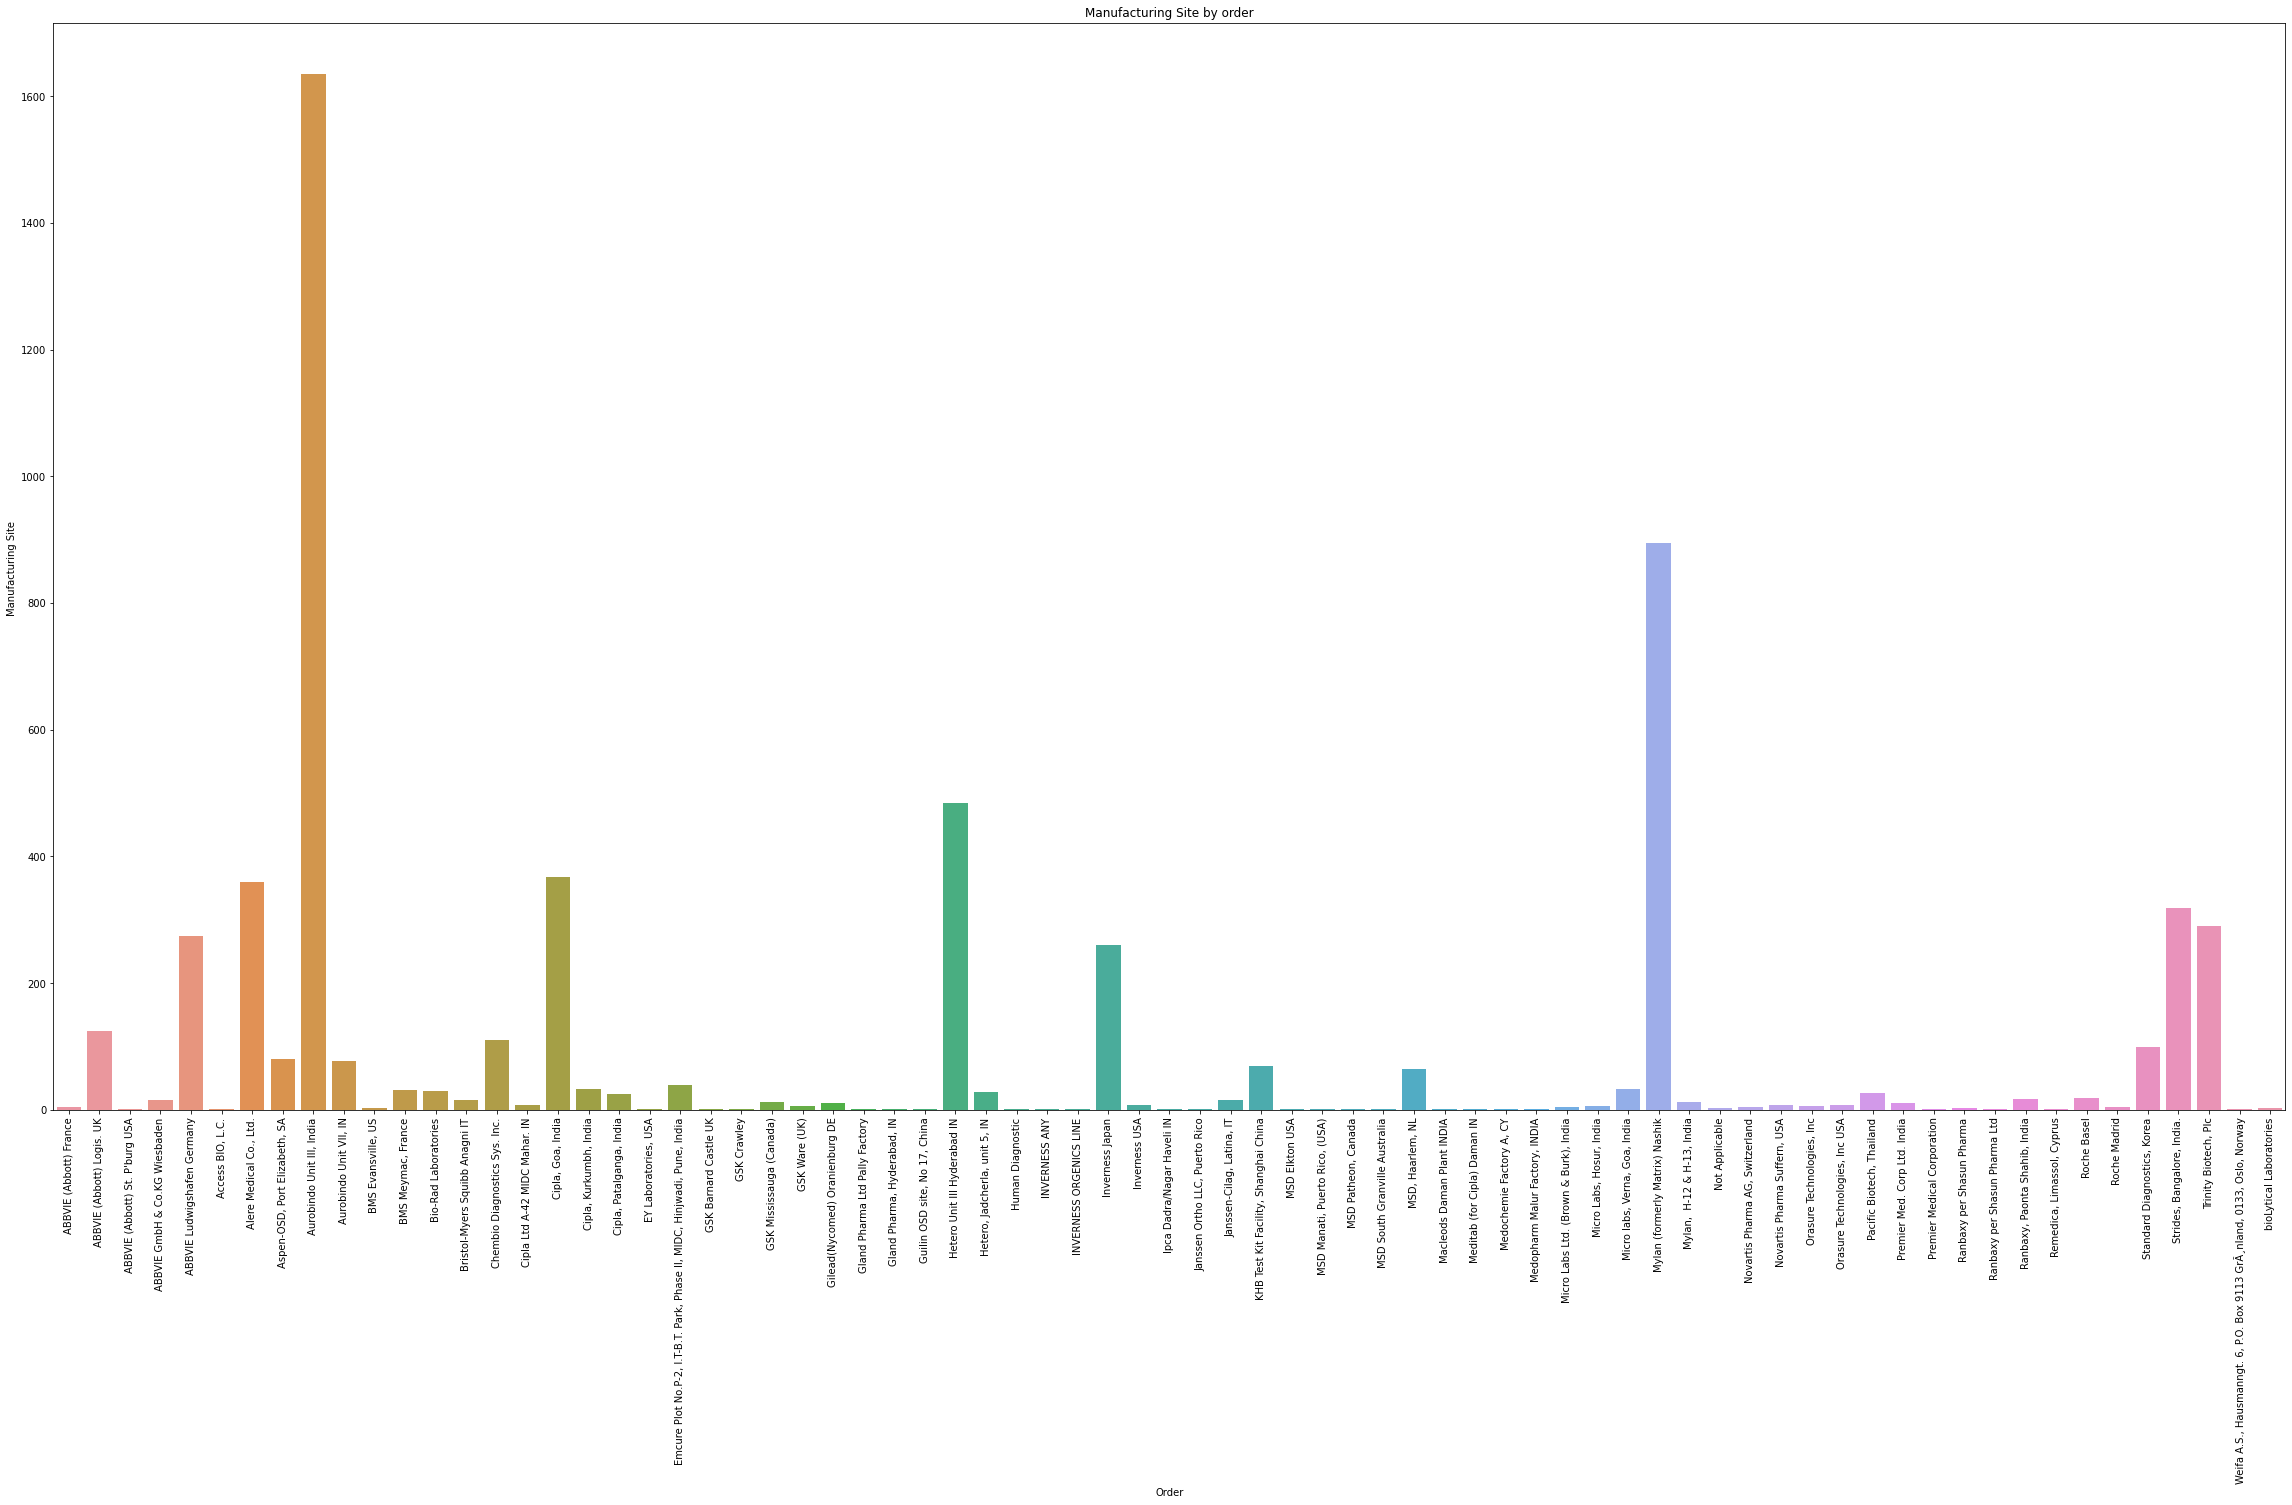

In [20]:
plt.figure(figsize=(40,20))
plt.rc({'font.size':30})
sns.barplot(x='Manufacturing Site',y='PO / SO #',data=mf_summary)
plt.xticks(rotation='vertical')
plt.ylabel('Manufacturing Site ')
plt.xlabel('Order')
plt.title('Manufacturing Site by order')
plt.show()

The above graph is displaying that Aurobindo Unit III,India is highest manufacturing site.

UN NECESSARY DATA REMOVE

In [21]:
X=data.drop(['Pack Price','Unit Price','ID','First Line Designation','Manufacturing Site','Dosage Form','Dosage','Brand','Sub Classification','Product Group','Delivery Recorded Date','Delivered to Client Date','Scheduled Delivery Date','PO Sent to Vendor Date','PQ First Sent to Client Date','Shipment Mode','Vendor INCO Term','Fulfill Via','Managed By','Country','ASN/DN #','PO / SO #','PQ #','Project Code'],axis=1)
data_1=X.copy()
Y1=data['Pack Price']
Y2= data['Unit Price']
X.head(10)
# data_1.head(10)

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
19,100,1000,80000.0,341,2682.47,128.00
22,240,1000,1920.0,941,4193.49,3.07
23,120,500,41095.0,117,1767.38,65.75
24,100,750,53992.5,171,3518.38,86.39
25,100,25,8750.0,60,3097.85,14.00
26,25,10000,200000.0,3335,27869.74,320.00
27,25,10000,200000.0,3335,28461.10,320.00
28,25,10000,200000.0,3335,28359.80,320.00
29,60,64000,99200.0,4228,12237.61,158.72
30,20,10000,270000.0,3263,20885.78,432.00


DATA SPLITTING

In [22]:
X_train,X_test = train_test_split(X,test_size=0.2,random_state=0)
Y1_train,Y1_test = train_test_split(Y1,test_size=0.2,random_state=0)
Y2_train,Y2_test = train_test_split(Y2,test_size=0.2,random_state=0)

In [23]:
X_train

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10008,30,3360,66931.20,617,2886.92,110.44
5550,120,7000,425740.00,1714,4881.42,437.66
7728,60,11837,153407.52,1319,15459.09,215.08
5665,30,1000,18000.00,133,1604.56,18.50
9117,30,56228,204669.92,6242,17129.96,286.95
...,...,...,...,...,...,...
8043,60,1660,11968.60,90,866.71,25.80
5627,30,70,315.70,6,9951.38,0.52
3059,100,2939,235120.00,1330,13801.89,290.84
4532,30,40593,452611.95,4585,6881.65,559.88


In [24]:
Y1_train

10008    19.92
5550     60.82
7728     12.96
5665     18.00
9117      3.64
         ...  
8043      7.21
5627      4.51
3059     80.00
4532     11.15
4734      8.11
Name: Pack Price, Length: 4793, dtype: float64

In [25]:
Y2_train

10008    0.66
5550     0.51
7728     0.22
5665     0.60
9117     0.12
         ... 
8043     0.12
5627     0.15
3059     0.80
4532     0.37
4734     0.14
Name: Unit Price, Length: 4793, dtype: float64

## FOR PACK PRICE

MODEL FITTING

In [26]:
final_list=[]
final_list2=[]
final_list3=[]
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),xgb.XGBRegressor(),AdaBoostRegressor(), GradientBoostingRegressor()]
result={}
for j in [5, 10, 15, 20,25, 30,35,39]:
        new=[]
       
        for i in model:
            
            
            i.fit(X_train,Y1_train)
            pred=i.predict(X_test)
            rmse = np.sqrt(mean_squared_error(Y1_test, pred))
            new.append(i.score(X_test, Y1_test))
            # scores=(cross_val_score(i,X_train,Y1_train,scoring="neg_mean_squared_error"))
        final_list.append(new)
        # final_list2.append(scores)
        # final_list3.append(r2_score(sc)ores))

SHOW R2_SCORE VALUES IN TABLE

In [27]:
pd.DataFrame(final_list,index=['5', '10', '15', '20', '25', '30','35','39'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','XGBRegressor()','adaboost','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,XGBRegressor(),adaboost,gradient boost
5,0.07226,0.896356,0.867763,0.951173,0.695682,0.949121
10,0.07226,0.901516,0.870367,0.951173,0.640406,0.949348
15,0.07226,0.916749,0.824239,0.951173,0.608445,0.953462
20,0.07226,0.897277,0.814935,0.951173,0.658729,0.946256
25,0.07226,0.898303,0.850616,0.951173,0.731362,0.948262
30,0.07226,0.902785,0.841857,0.951173,0.684959,0.949428
35,0.07226,0.937349,0.832856,0.951173,0.562373,0.951289
39,0.07226,0.906871,0.847802,0.951173,0.511705,0.950502


SHOW TABLE FOR EVERY REGRESSOR ERROR VALUE 

In [28]:
mse=[]
rms=[]
r2score=[]
all=[]
for i in model:
    i.fit(X_train,Y1_train)
    pred=i.predict(X_test)
    mse.append(mean_squared_error(Y1_test, pred))
    rms.append(np.sqrt(mean_squared_error(Y1_test, pred)))
    r2score.append(r2_score(Y1_test, pred))
all.append(mse)
all.append(rms)
all.append(r2score)

In [29]:
pd.DataFrame(all,index=['MEAN SQUARED ERROR','ROOT MEAN SQUARED ERROR','R2 SCORE'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','XGBRegressor','adaboost','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,XGBRegressor,adaboost,gradient boost
MEAN SQUARED ERROR,2607.442830,257.447811,407.431112,137.229569,921.836429,140.373430
ROOT MEAN SQUARED ERROR,51.063126,16.045180,20.184923,11.714502,30.361759,11.847929
R2 SCORE,0.072260,0.908399,0.855034,0.951173,0.672006,0.950054


Show here, XGBregressor has best r2_score is approximately 0.95

## FOR UNIT PRICE

MODEL FITTING

In [30]:
final_list=[]
final_list2=[]
final_list3=[]
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),xgb.XGBRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
result={}
for j in [5, 10, 15, 20,25, 30,35,39]:
        new=[]
       
        for i in model:
            
            
            i.fit(X_train,Y2_train)
            pred=i.predict(X_test)
            rmse = np.sqrt(mean_squared_error(Y2_test, pred))
            new.append(i.score(X_test, Y2_test))
            # scores=(cross_val_score(i,X_train,Y1_train,scoring="neg_mean_squared_error"))
        final_list.append(new)

SHOW R2_SCORE VALUES IN TABLE

In [31]:
pd.DataFrame(final_list,index=['5', '10', '15', '20', '25', '30','35','39'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','XGBRegressor()','AdaBoostRegressor','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,XGBRegressor(),AdaBoostRegressor,gradient boost
5,0.024017,0.843573,0.914654,0.940526,0.654797,0.917788
10,0.024017,0.895293,0.898395,0.940526,0.802494,0.925132
15,0.024017,0.908461,0.914086,0.940526,0.850799,0.923971
20,0.024017,0.830105,0.895146,0.940526,0.710372,0.924381
25,0.024017,0.897542,0.902258,0.940526,0.777467,0.921658
30,0.024017,0.908864,0.903121,0.940526,0.886959,0.923607
35,0.024017,0.882192,0.893125,0.940526,0.899229,0.921981
39,0.024017,0.908884,0.908247,0.940526,0.626423,0.925542


SHOW TABLE FOR EVERY REGRESSOR ERROR VALUE 

In [32]:
all=[]
mse=[]
rms=[]
r2score=[]

for i in model:
    i.fit(X_train,Y2_train)
    pred=i.predict(X_test)
    mse.append(mean_squared_error(Y2_test, pred))
    rms.append(np.sqrt(mean_squared_error(Y2_test, pred)))
    r2score.append(r2_score(Y2_test, pred))
all.append(mse)
all.append(rms)
all.append(r2score)

In [33]:
pd.DataFrame(all,index=['MEAN SQUARED ERROR','ROOT MEAN SQUARED ERROR','R2 SCORE'], columns=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','XGBRegressor','AdaBoostRegressor','gradient boost'])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,XGBRegressor,AdaBoostRegressor,gradient boost
MEAN SQUARED ERROR,5.640988,0.611550,0.533742,0.343746,1.302432,0.454786
ROOT MEAN SQUARED ERROR,2.375077,0.782017,0.730576,0.586298,1.141242,0.674378
R2 SCORE,0.024017,0.894192,0.907654,0.940526,0.774658,0.921315


Show here, XGBregressor has best r2_score is approximately 0.94

Here we show that, XGBRegressor is a best model for unit price and pack price. So we predict unit price and pack price with the help of this model.

## SAVING MODEL

FOR PACK PRICE

In [42]:
array1=np.array(X_train)
regressor = xgb.XGBRegressor()
regressor.fit(array1,Y1_train)
# pickle.dump(regressor,open('model1.pkl','wb'))
regressor.save_model('model1.json')


FOR UNIT PRICE

In [43]:
array2=np.array(X_train)
regressor = xgb.XGBRegressor()
regressor.fit(array2,Y2_train)
# pickle.dump(regressor,open('model2.pkl','wb'))
regressor.save_model('model2.json')

## LOADING MODEL

FOR PACK PRICE

In [44]:
# model=pickle.load(open('model1.pkl','rb'))
model=xgb.XGBRegressor()
model.load_model('model1.json')

print(model.predict([[30,3360,66931.20,617,2886.92,110.44]]))

[19.428179]


FOR UNIT PRCIE

In [45]:
# model=pickle.load(open('model2.pkl','rb'))
# model=xgb.Booster('model1.json')
model=xgb.XGBRegressor()
model.load_model('model2.json')

print(model.predict([[30,3360,66931.20,617,2886.92,110.44]]))

[0.6658007]


In [46]:
X_train=pd.DataFrame(X_train)
X_train.to_csv('X_train.csv')
Y1_train=pd.DataFrame(Y1_train)
Y1_train.to_csv('Y1_train.csv')